In [1]:
import warnings
warnings.filterwarnings('ignore')

# 한국어폰트지원
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

%config InlineBackend.figure_format = 'retina'
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='AppleGothic')
mpl.font_manager.findfont(font)

print("슝=3")

슝=3


In [2]:
import os
import math
#import squarify
import numpy as np
import pandas as pd
import seaborn as sns
#import geopandas as gpd      # 공간데이터
#import missingno as msno
#import country_converter as coco

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from collections import Counter
from matplotlib import gridspec

In [3]:
upcycling= pd.read_csv('/Users/yudongrin/Desktop/mac/AIFFEL/hackaton/new_musinsa(upcycling).csv', engine='python')
upcycling.head()

,Unnamed: 0,user,color,contents,category,ratings,gender,price,style,up_check,brand,url
0,0,멤버_464f9cc84f7d,기타,면,상의,5,남자,39000,0,0,119레오,https://www.musinsa.com/app/goods/1876547/0
1,1,멤버_464f9cc84f7d,카키,면,하의,5,남자,42000,0,0,119레오,https://www.musinsa.com/app/goods/2396824/0
2,2,멤버_464f9cc84f7d,기타,면,모자,5,남자,59000,0,0,119레오,https://www.musinsa.com/app/goods/2428013/0
3,3,멤버_464f9cc84f7d,블랙,면,상의,5,남자,35000,0,0,119레오,https://www.musinsa.com/app/goods/470357/0
4,4,멤버_464f9cc84f7d,아이보리,면 아라미드,가방,5,남자,48000,1,1,119레오,https://www.musinsa.com/app/goods/1766332/0


In [4]:
upcycling.drop(['url'], axis=1, inplace=True)
upcycling.head()

,Unnamed: 0,user,color,contents,category,ratings,gender,price,style,up_check,brand
0,0,멤버_464f9cc84f7d,기타,면,상의,5,남자,39000,0,0,119레오
1,1,멤버_464f9cc84f7d,카키,면,하의,5,남자,42000,0,0,119레오
2,2,멤버_464f9cc84f7d,기타,면,모자,5,남자,59000,0,0,119레오
3,3,멤버_464f9cc84f7d,블랙,면,상의,5,남자,35000,0,0,119레오
4,4,멤버_464f9cc84f7d,아이보리,면 아라미드,가방,5,남자,48000,1,1,119레오


In [5]:
upcycling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  715 non-null    int64 
 1   user        715 non-null    object
 2   color       715 non-null    object
 3   contents    715 non-null    object
 4   category    715 non-null    object
 5   ratings     715 non-null    int64 
 6   gender      715 non-null    object
 7   price       715 non-null    int64 
 8   style       715 non-null    int64 
 9   up_check    715 non-null    int64 
 10  brand       715 non-null    object
dtypes: int64(5), object(6)
memory usage: 61.6+ KB


In [6]:
# user 데이터 확인
print('upcycling unique 데이터 개수 :', upcycling['user'].nunique())
print('upcycling nan 개수 :', upcycling['user'].isnull().sum())

upcycling unique 데이터 개수 : 97
upcycling nan 개수 : 0


In [7]:
# ratings 데이터 확인
counted_ratings = upcycling['ratings'].value_counts()
print('ratings 카운트 : \n', counted_ratings)

ratings 카운트 : 
 5    634
4     68
3      8
2      4
1      1
Name: ratings, dtype: int64


# 색상

In [8]:
# color unique 데이터 개수, nan 확인
print('color unique 데이터 개수 :', upcycling['color'].nunique())
print('color nan 개수 :', upcycling['color'].isnull().sum())
print(upcycling['color'].unique())
print(upcycling['color'].value_counts())

color unique 데이터 개수 : 11
color nan 개수 : 0
['기타' '카키' '블랙' '아이보리' '그린' '화이트' '네이비' '베이지' '그레이' '블루' '멀티']
블랙      232
그레이      82
기타       71
블루       65
화이트      51
네이비      44
그린       42
멀티       37
카키       36
베이지      30
아이보리     25
Name: color, dtype: int64


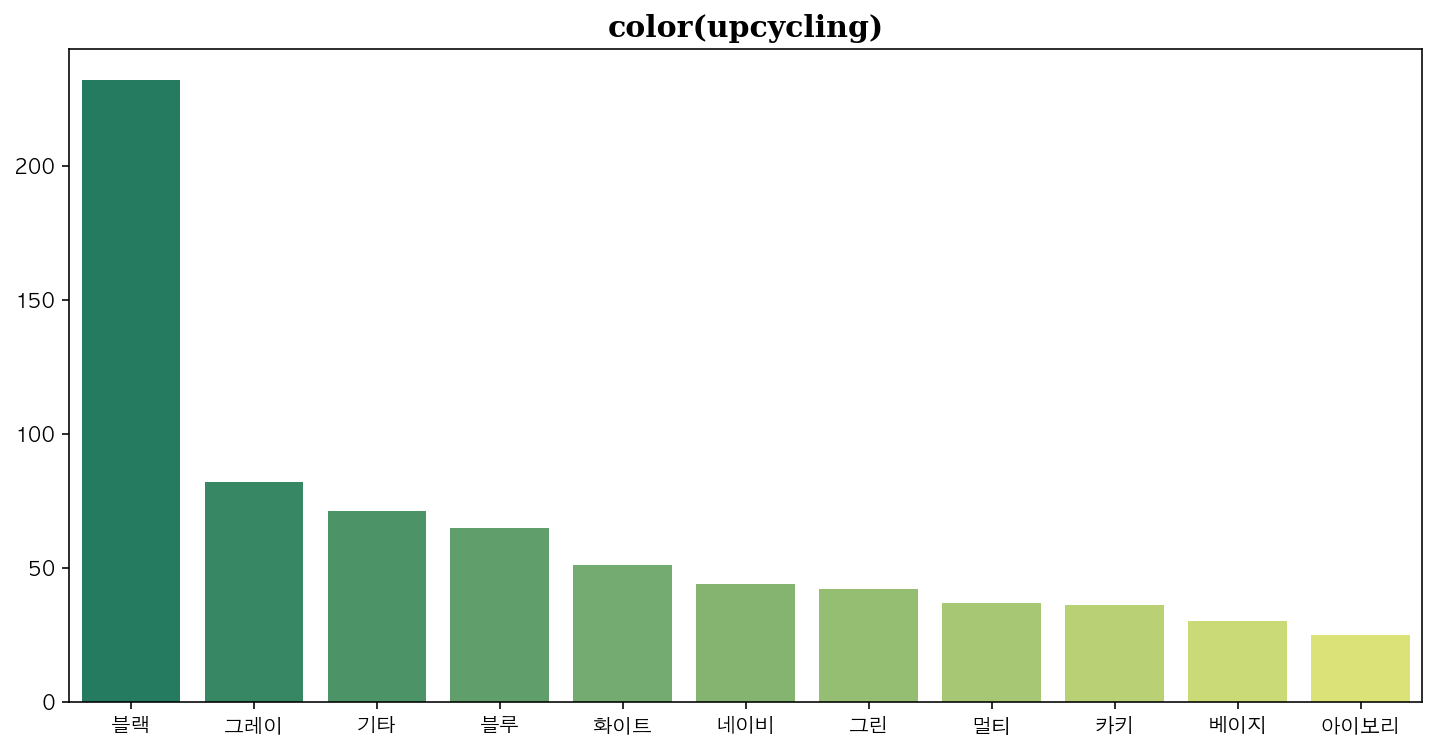

In [9]:
# 색상
color_data = upcycling['color']

for i in range(len(color_data)):
    color_data[i] = str(color_data[i])
# counter: 주어진 데이터를 카운팅하여 많은 순으로 나타냄
from collections import Counter
color_counting = pd.Series(dict(Counter(','.join(color_data).replace(' ,',',').replace(', ',',').split(',')))).sort_values(ascending=False)
#color_counting.drop(['NoDataAvailable'], axis=0, inplace=True)
tot = sum(color_counting)
top11 = sum(color_counting[:11])

top11_color = color_counting[:11]

from matplotlib import gridspec

fig = plt.figure(figsize=(20,6))
gs = gridspec.GridSpec(nrows=1, ncols=2,  #nrows: 행의 수/ncols: 열의 수
                      height_ratios=[6],
                      width_ratios=[10, 5])

ax = plt.subplot(gs[0])
sns.barplot(top11_color.index, top11_color, ax=ax, palette='summer')
ax.set_xticklabels(top11_color.index, rotation='0')
ax.set_title('color(upcycling)', font='serif', fontsize=15, fontweight='bold') #font: 글꼴 설정

plt.show()

# 소재

In [10]:
# contents unique 데이터 개수, nan 확인
print('contents unique 데이터 개수 :', upcycling['contents'].nunique())
print('contents nan 개수 :', upcycling['contents'].isnull().sum())
print(upcycling['contents'].unique())
print(upcycling['contents'].value_counts())

contents unique 데이터 개수 : 63
contents nan 개수 : 0
['면' '면 아라미드' '면 폴리에스터' '울 폴리에스터' '폴리에스터' '아크릴' '아라미드' '폴리에스터 나일론'
 '폴리에스터 레이온 폴리우레탄' '폴리에스터 폴리우레탄' '울 폴리에스터 레이온 폴리우레탄' 'None'
 '린넨 면 레이온 폴리에스터' '광고현수막' '나일론' '타이어이너튜브' '폴리에스터 레이온' '타이어튜브' '면 마'
 '폴리에스터 레이온 나일론' '폴리에스터 레더' '울 나일론' '레더' '면 레이온' '면 폴라에스터' '폴리에스터 폴리'
 '면 폴리에스터 나일론' '면 폴리우레탄' '면 나일론 폴리우레탄' '면 나일론' '면 린넨' '폴리에스터 아크릴 폴리우레탄'
 '나일론 레더' '나일론 폴리에스터' '면 폴리에스터 폴리우레탄' '면 나일론 폴리에스터' '폴리에스터 캐시미어 울' '울'
 '타포린' '톤백' '울 아크릴 나일론' '리사이클폴리에스터' '아크릴 울 나일론' '아크릴 면 나일론' '레이온'
 '리사이클폴리에스터 리사이클스판덱스' '리사이클폴리에스터 폴리우레탄' '타이벡' '아크릴 폴리에스터 울 나일론 폴리우레탄'
 '폴리에스터 레이온 울 폴리우레탄' '레이온 폴리에스터' '레더 폴리에스터' '울 복합소재' '면 아크릴' '캐시미어 나일론 울'
 '아크릴 폴리에스터 폴리우레탄' '코듀라' '아크릴 나일론 울' '레이온 나일론' '면 종이'
 '울 나일론 아크릴 폴리에스터 폴리우레탄' '레이온 폴리에스터 나일론' '울 아크릴']
면                        252
폴리에스터                     65
면 폴리에스터                   58
나일론                       51
폴리에스터 폴리우레탄               44
                        ... 
폴리에스터 아크릴 폴리우레탄            1
울 폴리에스터 레이온 폴리우레탄          

In [11]:
# contents 데이터 수정
upcycling.replace({'contents':'폴리'}, '폴리에스터', inplace=True)
upcycling.replace({'contents':'폴리에스터/스판'}, '폴리에스터/폴리우레탄', inplace=True)
upcycling.replace({'contents':'천연가죽/폴리에스터'}, '레더/폴리에스터', inplace=True)
upcycling.replace({'contents':'폴리에스터/레이온/스판'}, '폴리에스터/레이온/폴리우레탄', inplace=True)
upcycling.replace({'contents':'아크릴/폴리에스터/스판'}, '아크릴/폴리에스터/폴리우레탄', inplace=True)
upcycling.replace({'contents':'면/폴리'}, '면/폴리에스터', inplace=True)
upcycling.replace({'contents':'비건 레더'}, '레더', inplace=True)
upcycling.replace({'contents':'울/폴리'}, '울/폴리에스터', inplace=True)
upcycling.replace({'contents':['테리', '코마사']}, '면', inplace=True)
upcycling.replace({'contents':'면/스판'}, '면/폴리우레탄', inplace=True)
upcycling.replace({'contents':'울/나일론/아크릴/폴리에스트/스판'}, '울/나일론/아크릴/폴리에스터/폴리우레탄', inplace=True)
upcycling.replace({'contents':'비스코스/폴리/나일론'}, '레이온/폴리에스터/나일론', inplace=True)
upcycling.replace({'contents':'나일론/합성가죽'}, '나일론/레더', inplace=True)
upcycling.replace({'contents':'면/폴리에스터/스판'}, '면/폴리에스터/폴리우레탄', inplace=True)
upcycling.replace({'contents':'폴리에스터/캐시미어/모'}, '폴리에스터/캐시미어/울', inplace=True)
upcycling.replace({'contents':'폴리/스판'}, '폴리에스터/폴리우레탄', inplace=True)
upcycling.replace({'contents':'면/나일론/폴리'}, '면/나일론/폴리에스터', inplace=True)
upcycling.replace({'contents':'아라미드/캔버스'}, '면/아라미드', inplace=True)
upcycling.replace({'contents':'트윌'}, '면', inplace=True)
upcycling.replace({'contents':'울/폴리/레이온/스판'}, '울/폴리에스터/레이온/폴리우레탄', inplace=True)
upcycling.replace({'contents':['리사이클', '아라미드/소방복']}, '아라미드', inplace=True)
upcycling.replace({'contents':'면/레이온/폴리'}, '린넨/면/레이온/폴리에스터', inplace=True)
upcycling.replace({'contents':'면/모달'}, '면/레이온', inplace=True)

print('contents unique 데이터 개수 :', upcycling['contents'].nunique())
print(upcycling['contents'].unique())
print(upcycling['contents'].value_counts())

contents unique 데이터 개수 : 63
['면' '면 아라미드' '면 폴리에스터' '울 폴리에스터' '폴리에스터' '아크릴' '아라미드' '폴리에스터 나일론'
 '폴리에스터 레이온 폴리우레탄' '폴리에스터 폴리우레탄' '울 폴리에스터 레이온 폴리우레탄' 'None'
 '린넨 면 레이온 폴리에스터' '광고현수막' '나일론' '타이어이너튜브' '폴리에스터 레이온' '타이어튜브' '면 마'
 '폴리에스터 레이온 나일론' '폴리에스터 레더' '울 나일론' '레더' '면 레이온' '면 폴라에스터' '폴리에스터 폴리'
 '면 폴리에스터 나일론' '면 폴리우레탄' '면 나일론 폴리우레탄' '면 나일론' '면 린넨' '폴리에스터 아크릴 폴리우레탄'
 '나일론 레더' '나일론 폴리에스터' '면 폴리에스터 폴리우레탄' '면 나일론 폴리에스터' '폴리에스터 캐시미어 울' '울'
 '타포린' '톤백' '울 아크릴 나일론' '리사이클폴리에스터' '아크릴 울 나일론' '아크릴 면 나일론' '레이온'
 '리사이클폴리에스터 리사이클스판덱스' '리사이클폴리에스터 폴리우레탄' '타이벡' '아크릴 폴리에스터 울 나일론 폴리우레탄'
 '폴리에스터 레이온 울 폴리우레탄' '레이온 폴리에스터' '레더 폴리에스터' '울 복합소재' '면 아크릴' '캐시미어 나일론 울'
 '아크릴 폴리에스터 폴리우레탄' '코듀라' '아크릴 나일론 울' '레이온 나일론' '면 종이'
 '울 나일론 아크릴 폴리에스터 폴리우레탄' '레이온 폴리에스터 나일론' '울 아크릴']
면                        252
폴리에스터                     65
면 폴리에스터                   58
나일론                       51
폴리에스터 폴리우레탄               44
                        ... 
폴리에스터 아크릴 폴리우레탄            1
울 폴리에스터 레이온 폴리우레탄          1
폴리에스터 레더          

In [12]:
counted_contents = upcycling['contents'].value_counts()[0:20]
print(counted_contents)

면                     252
폴리에스터                  65
면 폴리에스터                58
나일론                    51
폴리에스터 폴리우레탄            44
폴리에스터 레이온 폴리우레탄        31
None                   27
아크릴                    16
타이어튜브                  13
레더                     13
면 폴리우레탄                12
광고현수막                  12
폴리에스터 나일론               9
면 나일론                   8
면 폴리에스터 폴리우레탄           8
리사이클폴리에스터 리사이클스판덱스      7
폴리에스터 레이온               7
면 아라미드                  7
리사이클폴리에스터               5
아라미드                    5
Name: contents, dtype: int64


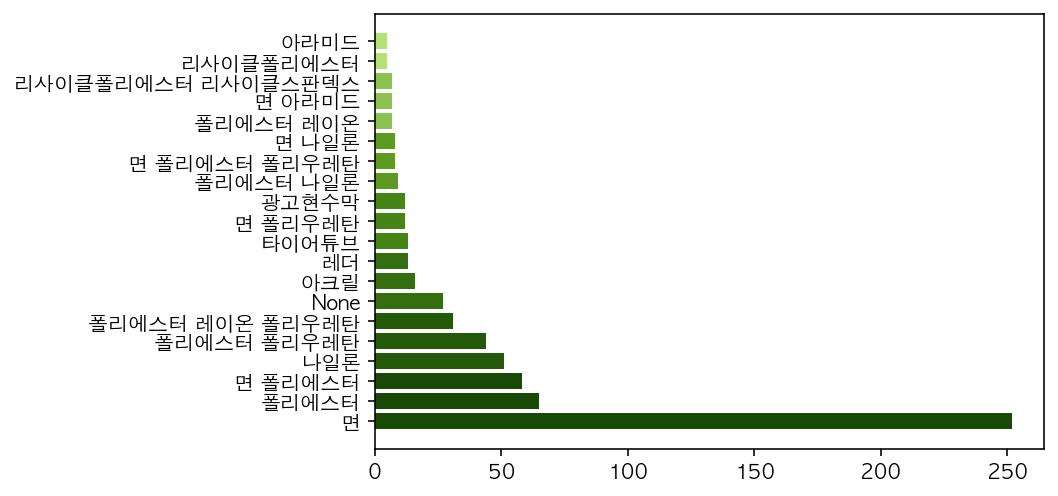

In [13]:
import matplotlib.pyplot as plt
import numpy as np

y = np.arange(20)
years = ['면', '폴리에스터', '면 폴리에스터', '나일론', '폴리에스터 폴리우레탄', '폴리에스터 레이온 폴리우레탄', 'None', '아크릴', '레더', '타이어튜브', '면 폴리우레탄', '광고현수막', '폴리에스터 나일론', '면 폴리에스터 폴리우레탄', '면 나일론','폴리에스터 레이온', '면 아라미드', '리사이클폴리에스터 리사이클스판덱스', '리사이클폴리에스터', '아라미드']
values = [252, 65, 58, 51, 44, 31, 27, 16, 13, 13, 12, 12, 9, 8, 8, 7, 7, 7, 5, 5]
colors = ['#194906','#194906','#194906','#24590A','#24590A','#24590A','#346E11','#346E11','#346E11','#478418','#478418','#478418','#5c9a22','#5c9a22','#5c9a22','#8DC250','#8DC250','#8DC250','#B5E077','#B5E077']

plt.barh(y, values, color=colors)
plt.yticks(y, years)

plt.show()

# 성별

In [14]:
# gender unique 데이터 개수, nan 확인
print('gender unique 데이터 개수 :', upcycling['gender'].nunique())
print('gender nan 개수 :', upcycling['gender'].isnull().sum())
print(upcycling['gender'].unique())
print(upcycling['gender'].value_counts())

gender unique 데이터 개수 : 3
gender nan 개수 : 0
['남자' '여자' '알수없음']
남자      289
여자      286
알수없음    140
Name: gender, dtype: int64


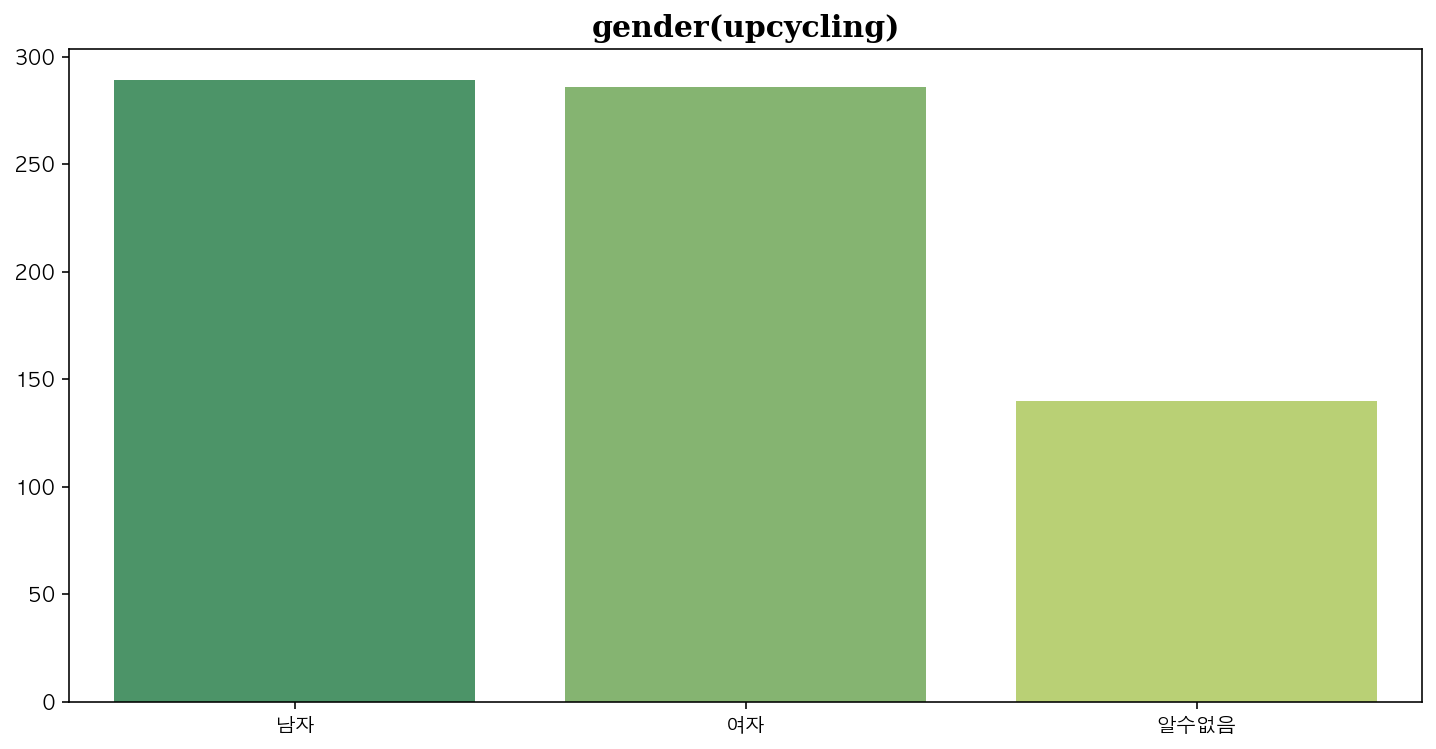

In [15]:
gender_data = upcycling['gender']

for i in range(len(gender_data)):
    gender_data[i] = str(gender_data[i])
# counter: 주어진 데이터를 카운팅하여 많은 순으로 나타냄
from collections import Counter
gender_counting = pd.Series(dict(Counter(','.join(gender_data).replace(' ,',',').replace(', ',',').split(',')))).sort_values(ascending=False)
#color_counting.drop(['NoDataAvailable'], axis=0, inplace=True)
tot = sum(gender_counting)
top3 = sum(gender_counting[:3])

top3_gender = gender_counting[:3]

from matplotlib import gridspec

fig = plt.figure(figsize=(20,6))
gs = gridspec.GridSpec(nrows=1, ncols=2,  #nrows: 행의 수/ncols: 열의 수
                      height_ratios=[6],
                      width_ratios=[10, 5])

ax = plt.subplot(gs[0])
sns.barplot(top3_gender.index, top3_gender, ax=ax, palette='summer')
ax.set_xticklabels(top3_gender.index, rotation='0')
ax.set_title('gender(upcycling)', font='serif', fontsize=15, fontweight='bold') #font: 글꼴 설정

plt.show()

# 가격

In [16]:
# price unique 데이터 개수, nan 확인
print('price unique 데이터 개수 :', upcycling['price'].nunique())
print('price nan 개수 :', upcycling['price'].isnull().sum())

price unique 데이터 개수 : 192
price nan 개수 : 0


In [17]:
upcycling['price'].describe()

count    7.150000e+02
mean     7.484263e+04
std      9.316163e+04
min      1.000000e+02
25%      3.900000e+04
50%      5.800000e+04
75%      8.770000e+04
max      2.168182e+06
Name: price, dtype: float64

In [18]:
counted_price = upcycling['price'].value_counts()
print(counted_price)

39000     46
49000     32
79000     31
69000     28
49900     27
          ..
11900      1
230000     1
77000      1
97900      1
74500      1
Name: price, Length: 192, dtype: int64


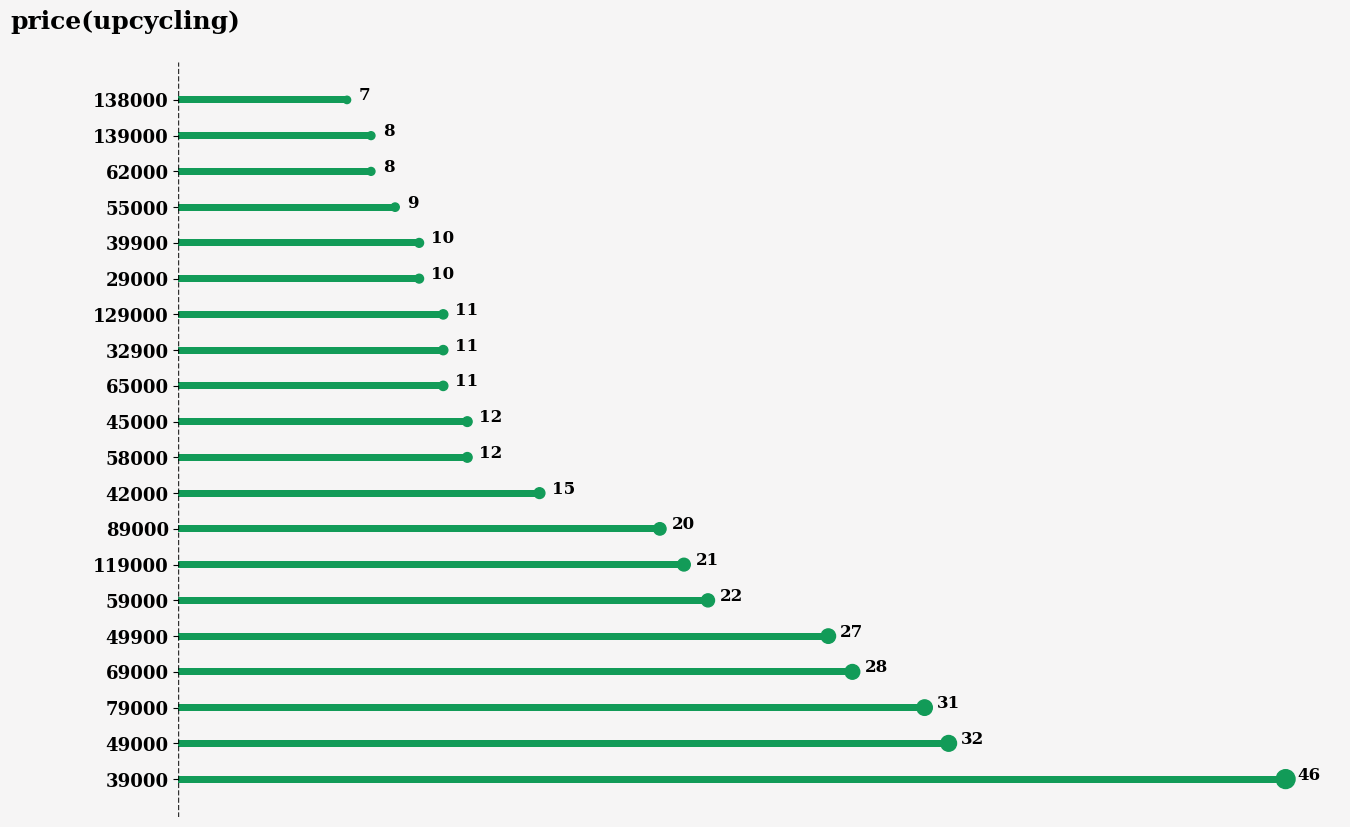

In [19]:
# Series의 index, value를 x, y 지정
x = upcycling.price.value_counts()[0:20].index,
y = upcycling.price.value_counts()[0:20].values

fig,ax = plt.subplots(figsize = (15,10),dpi = 50)
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

# 수평막대
ax.barh(y = range(0,20), width = y, height = 0.2, color = '#129B58')
# 선끝에 원 그리기
ax.scatter(y = range(0,20), x = y, s = (y) *4, c = '#129B58')
# text, 수평막대 사이의 세로선
ax.axvline(x = 0, ymin = 0, ymax = 1, **{'linewidth':1, 'linestyle':'--', 'color':'black'}, alpha = 0.8)

for i, j in zip(y, range(0, 20)):
    ax.text(i+0.5,j,i,{'font':'serif', 'size':12, 'weight':'bold'})

# 그래프 눈금
ax.set_yticks(ticks = range(0,20))
ax.set_yticklabels(x[0].tolist()[0:20], {'font':'serif', 'size':13, 'weight':'bold'})
ax.set_xticklabels(labels = [])
ax.set_xticks(ticks = [])

# text 조건
ax.text(-7, 21, 'price(upcycling)',{'font':'serif', 'size':18, 'weight':'bold'})
plt.box(None)

fig.show()

# 무늬

In [20]:
# style count, nan 확인
print(upcycling['style'].value_counts())
print('style nan 개수 :', upcycling['style'].isnull().sum())

0    587
1    128
Name: style, dtype: int64
style nan 개수 : 0


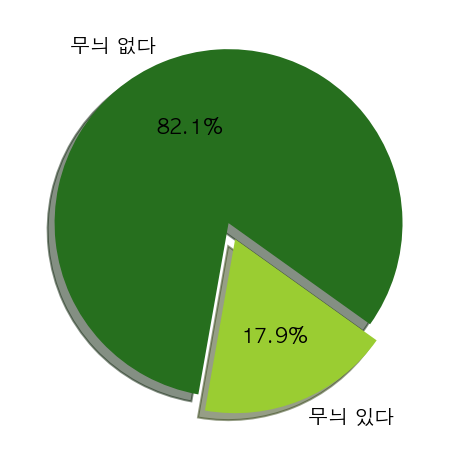

In [21]:
import matplotlib.pyplot as plt

ratio = [587, 128]
labels = ['무늬 없다', '무늬 있다']
explode = [0.05, 0.05]
colors = ['#266F1E', 'yellowgreen']

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors)
plt.show()

# 브랜드 개수

In [22]:
# style count, nan 확인
print(upcycling['brand'].value_counts())
print('brand nan 개수 :', upcycling['brand'].isnull().sum())

플리츠마마      212
누깍         188
오버랩업사이클    181
119레오       68
큐클리프        35
카네이테이       31
Name: brand, dtype: int64
brand nan 개수 : 0


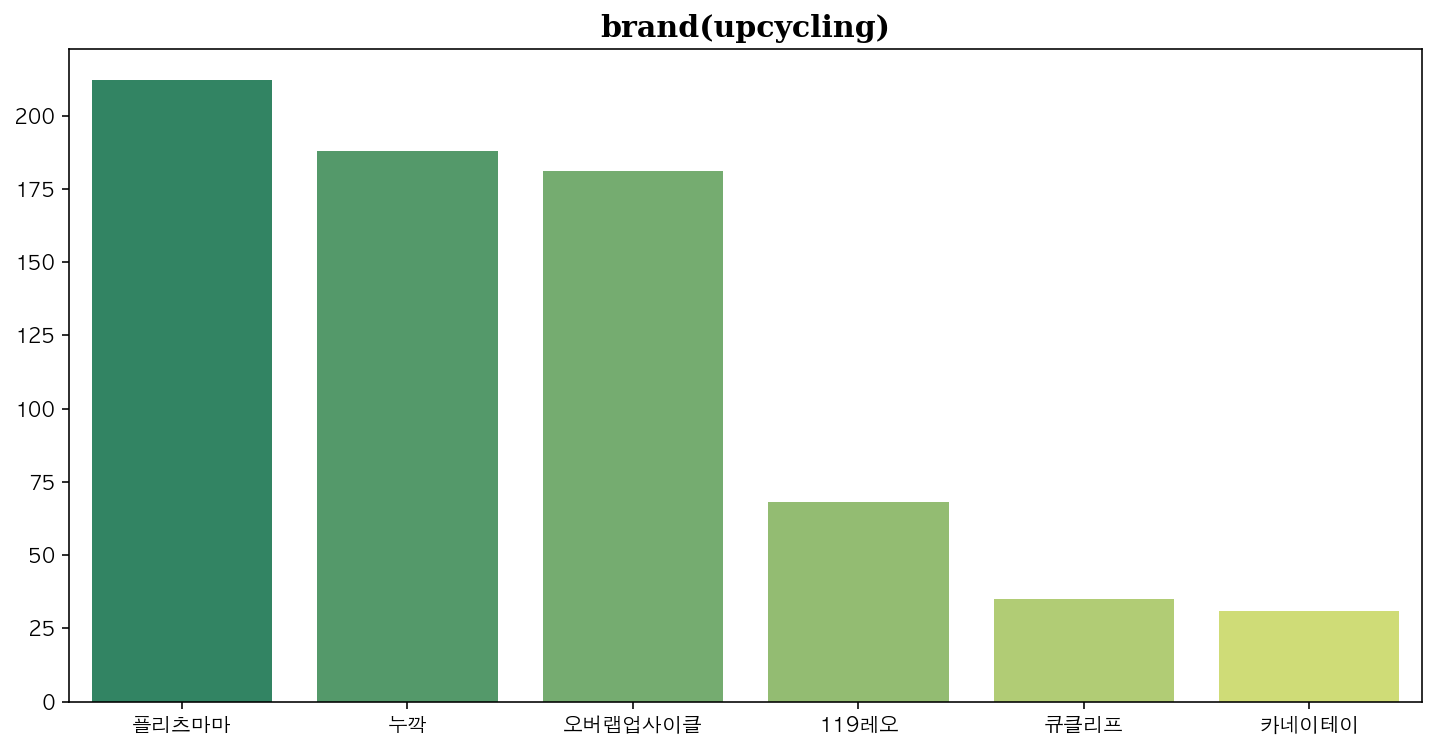

In [23]:
brand_data = upcycling['brand']

for i in range(len(brand_data)):
    brand_data[i] = str(brand_data[i])
# counter: 주어진 데이터를 카운팅하여 많은 순으로 나타냄
from collections import Counter
brand_counting = pd.Series(dict(Counter(','.join(brand_data).replace(' ,',',').replace(', ',',').split(',')))).sort_values(ascending=False)
#color_counting.drop(['NoDataAvailable'], axis=0, inplace=True)
tot = sum(brand_counting)
top6 = sum(brand_counting[:6])

top6_brand = brand_counting[:6]

from matplotlib import gridspec

fig = plt.figure(figsize=(20,6))
gs = gridspec.GridSpec(nrows=1, ncols=2,  #nrows: 행의 수/ncols: 열의 수
                      height_ratios=[6],
                      width_ratios=[10, 5])

ax = plt.subplot(gs[0])
sns.barplot(top6_brand.index, top6_brand, ax=ax, palette='summer')
ax.set_xticklabels(top6_brand.index, rotation='0')
ax.set_title('brand(upcycling)', font='serif', fontsize=15, fontweight='bold') #font: 글꼴 설정

plt.show()

# 종류 개수

In [24]:
# style count, nan 확인
print(upcycling['category'].value_counts())
print('category nan 개수 :', upcycling['category'].isnull().sum())

상의     329
하의     158
가방     120
모자      76
셋업      16
파우치     16
Name: category, dtype: int64
category nan 개수 : 0


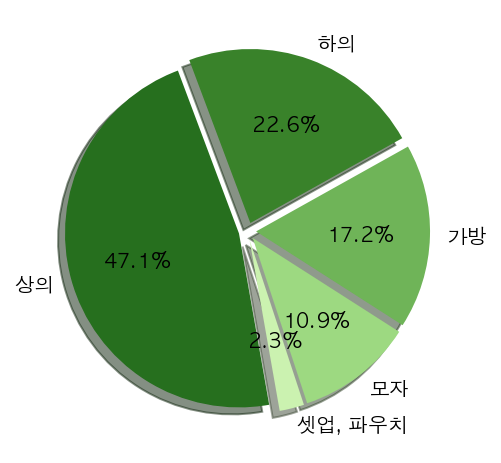

In [25]:
import matplotlib.pyplot as plt

ratio = [329, 158, 120, 76, 16]
labels = ['상의', '하의', '가방', '모자', '셋업, 파우치']
explode = [0.05, 0.05, 0.05, 0.05, 0.05]
colors = ['#266F1E', '#39822a', '#6FB458', '#9DD981', '#CBF2B0']

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=280, counterclock=False, explode=explode, shadow=True, colors=colors)
plt.show()